In [1]:

#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as metrics


In [2]:

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [6]:
# importing the dataset
df = pd.read_csv("train.csv")

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
df.shape

(1460, 81)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
# Describe the dataset
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


DATA Cleanning & PRE PROCESSING

In [10]:
# Null values in the dataset
df.isnull().sum().sort_values(ascending=False)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

In [11]:
# Checking the percentage of null values in the dataframe df1
round(100*(df.isnull().sum()/len(df.index)), 2).sort_values(ascending=False)

PoolQC         99.52
MiscFeature    96.30
Alley          93.77
Fence          80.75
FireplaceQu    47.26
               ...  
ExterQual       0.00
Exterior2nd     0.00
Exterior1st     0.00
RoofMatl        0.00
SalePrice       0.00
Length: 81, dtype: float64

In [12]:
#Checking the unique values for the columns
df['PoolQC'].value_counts()

Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64

In [13]:
#Checking the unique values for the columns
df['MiscFeature'].value_counts()

Shed    49
Othr     2
Gar2     2
TenC     1
Name: MiscFeature, dtype: int64

In [14]:
#Checking the unique values for the columns
df['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [15]:
#Check the unique values for the columns
df['Fence'].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [16]:
df.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis =1, inplace = True)

In [18]:
# Check the percentage of null values in the dataframe 'df1' column-wise
round(100*(df.isnull().sum()/len(df.index)), 2).sort_values(ascending=False)

FireplaceQu     47.26
LotFrontage     17.74
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
                ...  
BsmtUnfSF        0.00
TotalBsmtSF      0.00
MSSubClass       0.00
HeatingQC        0.00
SalePrice        0.00
Length: 77, dtype: float64

In [19]:
#Check the values and their distributions of the 'FireplaceQu'
df['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [20]:
df['FireplaceQu'] = df['FireplaceQu'].replace(np.nan, 'NA')

In [21]:
#Check the values and their distributions of the 'FireplaceQu'
df['FireplaceQu'].value_counts()

NA    690
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [22]:
df['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

<AxesSubplot:xlabel='LotFrontage'>

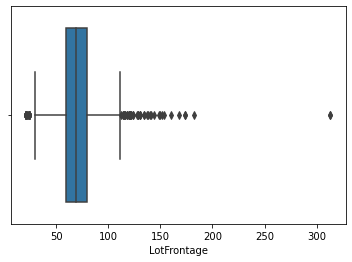

In [23]:
#check outliers in the column
sns.boxplot('LotFrontage', data = df)

In [24]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())

In [25]:
df['GarageYrBlt'].value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1906.0     1
1908.0     1
1933.0     1
1900.0     1
1927.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

In [26]:
import datetime as d
current_year = int(d.datetime.now().year)

In [28]:
#Caluculating the age of the garage based on the year it was built
df['GarageYrBlt'] = current_year-df['GarageYrBlt']

<AxesSubplot:xlabel='GarageYrBlt'>

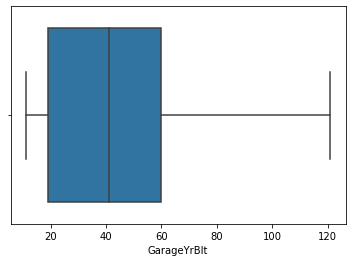

In [29]:
#To understand if thre are any outliers in the column
sns.boxplot('GarageYrBlt', data = df)

In [30]:
#There are no outliers so we can impute the data with the mean of the age of which garage was built
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean())

In [32]:
#Caluculating the number of years the house was sold from the current year
df['YrSold'] = current_year-df['YrSold']

In [33]:
#Caluculating the number of years the house was built from the current year
df['YearBuilt'] = current_year-df['YearBuilt']

In [34]:
#Caluculating the number of years the house was built from the current year
df['YearRemodAdd'] = current_year-df['YearRemodAdd']

In [35]:
df['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [36]:
#Replacing NaN values to NA which indicates that the property doesnt have a garage.
df['GarageType'] = df['GarageType'].replace(np.nan, 'NA')

In [37]:
df['GarageFinish'].value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [38]:
#Replacing NaN values to NA which indicates that the property doesnt have a garage.
df['GarageFinish'] = df['GarageFinish'].replace(np.nan, 'NA')

In [39]:
df['GarageQual'].value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [40]:
#Replacing NaN values to NA which indicates that the property doesnt have a garage.
df['GarageQual'] = df['GarageQual'].replace(np.nan, 'NA')

In [41]:
#Replacing NaN values to NA which indicates that the property doesnt have a garage.
df['GarageCond'] = df['GarageCond'].replace(np.nan, 'NA')

In [42]:
df['BsmtExposure'].value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [43]:
#Replacing NaN values to NA which indicates that the property doesnt have a garage. It is also the mode for the data
df['BsmtExposure'] = df['BsmtExposure'].replace(np.nan, 'NA')

In [44]:
df['BsmtFinType2'].value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [45]:
#Replacing NaN values to NA which indicates that the property doesnt have a garage.
df['BsmtFinType2'] = df['BsmtFinType2'].replace(np.nan, 'NA')

In [46]:
df['BsmtFinType1'].value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [47]:
#Replacing NaN values to NA which indicates that the property doesnt have a garage.
df['BsmtFinType1'] = df['BsmtFinType1'].replace(np.nan, 'NA')

In [48]:
df['BsmtCond'].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [49]:
#Replacing NaN values to NA which indicates that the property doesnt have a garage.
df['BsmtCond'] = df['BsmtCond'].replace(np.nan, 'NA')

In [50]:
#Replacing NaN values to NA which indicates that the property doesnt have a garage.
df['BsmtQual'] = df['BsmtQual'].replace(np.nan, 'NA')

In [51]:
df['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
NA     37
Fa     35
Name: BsmtQual, dtype: int64

In [52]:
#Replacing NaN values to NA which indicates that the property doesnt have a garage.
df['BsmtQual'] = df['BsmtQual'].replace(np.nan, 'NA')

<AxesSubplot:xlabel='MasVnrArea'>

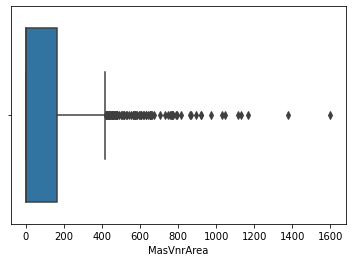

In [53]:
#To understand if thre are any outliers in the column
sns.boxplot('MasVnrArea', data = df)

In [57]:
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].median())

In [55]:
df['MasVnrArea'].isnull().sum()

8

In [56]:
df['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [58]:
df['MasVnrType'].mode()

0    None
dtype: object

In [59]:
df['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [60]:
#Replacing it with the mode i.e. the SBrkr
df['Electrical'] = df['Electrical'].replace(np.nan, 'SBrkr')

In [62]:
# Checking the percentage of null values in the dataframe 'df1' column-wise
round(100*(df.isnull().sum()/len(df.index)), 2).sort_values(ascending=False)

MasVnrType     0.55
Id             0.00
HalfBath       0.00
Fireplaces     0.00
Functional     0.00
               ... 
MasVnrArea     0.00
Exterior2nd    0.00
Exterior1st    0.00
RoofMatl       0.00
SalePrice      0.00
Length: 77, dtype: float64

In [64]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

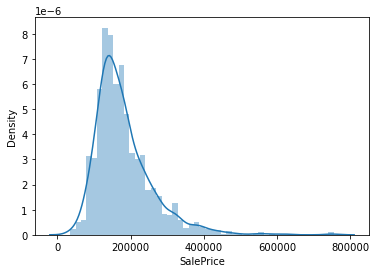

In [65]:
#To see if the 'SalePrice' column is normally distributed to apply regression on it
sns.distplot(df['SalePrice'])

In [67]:
#Applying the log transformation technique on the SalePrice column to convert into a normal distributed data
df['log_value'] = np.log(df['SalePrice'])

In [ ]:
sns.distplot(df1['log_value'])

In [70]:
#converting the MSSubClass into a object class as the current column is being identified as int where in actual its being an categorical
df['MSSubClass'] = df['MSSubClass'].astype(object)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [72]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,log_value
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2,13,WD,Normal,208500,12.247694
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,5,14,WD,Normal,181500,12.109011
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,9,13,WD,Normal,223500,12.317167
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,2,15,WD,Abnorml,140000,11.849398
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,12,13,WD,Normal,250000,12.429216


In [73]:
#Dropping the columns
df.drop(['Heating','SaleCondition', 'CentralAir', 'LowQualFinSF', 'KitchenAbvGr', 'Functional', 'SaleType', 'MoSold', 'MiscVal', 'PoolArea','ScreenPorch', '3SsnPorch', 'PavedDrive', 'EnclosedPorch', 'BsmtFinSF2', 'Condition2', 'BldgType', 'RoofStyle', 'RoofMatl','ExterCond', 'Utilities', 'Electrical', 'BsmtCond', 'BsmtFinType2', 'GarageQual', 'GarageCond'], axis =1, inplace = True)

In [74]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'YrSold', 'SalePrice', 'log_value'],
      dtype='object')

DATA EXPLORATION

In [76]:
# all numeric (float and int) variables in the dataset
df1 = df.select_dtypes(include=['float64', 'int64'])
df1.head()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,YrSold,SalePrice,log_value
0,1,65.0,8450,7,5,18,18,196.0,706,150,...,8,0,18.0,2,548,0,61,13,208500,12.247694
1,2,80.0,9600,6,8,45,45,0.0,978,284,...,6,1,45.0,2,460,298,0,14,181500,12.109011
2,3,68.0,11250,7,5,20,19,162.0,486,434,...,6,1,20.0,2,608,0,42,13,223500,12.317167
3,4,60.0,9550,7,5,106,51,0.0,216,540,...,7,1,23.0,3,642,0,35,15,140000,11.849398
4,5,84.0,14260,8,5,21,21,350.0,655,490,...,9,1,21.0,3,836,192,84,13,250000,12.429216


In [77]:
df['BsmtFullBath'].value_counts()

0    856
1    588
2     15
3      1
Name: BsmtFullBath, dtype: int64

In [78]:
df['BsmtHalfBath'].value_counts()

0    1378
1      80
2       2
Name: BsmtHalfBath, dtype: int64

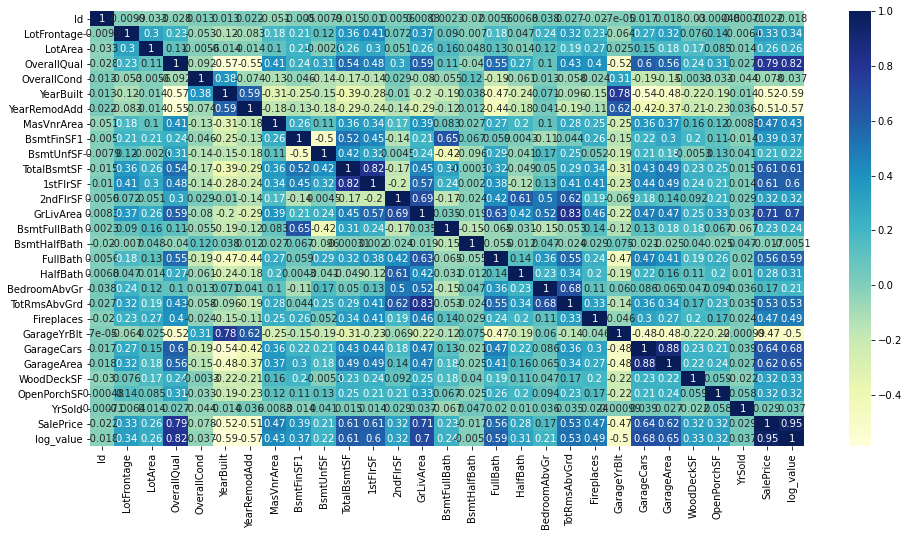

In [79]:
# correlation matrix
cor = df1.corr()

# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

In [80]:
cor*100

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,YrSold,SalePrice,log_value
Id,100.000000,-0.992147,-3.322552,-2.836475,1.260892,1.271272,2.199764,-5.107140,-0.502405,-0.793970,...,2.723872,-1.977163,-0.007026,1.656968,1.763378,-2.964320,-0.047691,-0.071179,-2.191672,-1.794238
LotFrontage,-0.992147,100.000000,30.452217,23.481226,-5.328067,-11.668539,-8.334809,17.846857,21.436661,12.409821,...,32.051766,23.322064,-6.437009,26.953925,32.351093,7.554211,13.701356,-0.638043,33.477085,33.529150
LotArea,-3.322552,30.452217,100.000000,10.580574,-0.563627,-1.422765,-1.378843,10.332051,21.410313,-0.261836,...,19.001478,27.136401,2.481205,15.487074,18.040276,17.169769,8.477381,1.426141,26.384335,25.731989
OverallQual,-2.836475,23.481226,10.580574,100.000000,-9.193234,-57.232277,-55.068392,40.725212,23.966597,30.815893,...,42.745234,39.676504,-51.801821,60.067072,56.202176,23.892339,30.881882,2.734671,79.098160,81.718442
OverallCond,1.260892,-5.328067,-0.563627,-9.193234,100.000000,37.598320,-7.374150,-12.569363,-4.623086,-13.684057,...,-5.758317,-2.381998,30.616876,-18.575751,-15.152137,-0.333370,-3.258881,-4.394975,-7.785589,-3.686799
YearBuilt,1.271272,-11.668539,-1.422765,-57.232277,37.598320,100.000000,59.285498,-31.160011,-24.950320,-14.904039,...,-9.558913,-14.771640,78.055499,-53.785009,-47.895382,-22.488014,-18.868584,-1.361768,-52.289733,-58.657024
YearRemodAdd,2.199764,-8.334809,-1.378843,-55.068392,-7.374150,59.285498,100.000000,-17.652918,-12.845055,-18.113309,...,-19.173982,-11.258132,61.812984,-42.062215,-37.159981,-20.572592,-22.629763,3.574325,-50.710097,-56.560783
MasVnrArea,-5.107140,17.846857,10.332051,40.725212,-12.569363,-31.160011,-17.652918,100.000000,26.125605,11.386216,...,27.956789,24.701528,-24.617754,36.194457,37.088415,15.999053,12.252833,0.831662,47.261450,42.677513
BsmtFinSF1,-0.502405,21.436661,21.410313,23.966597,-4.623086,-24.950320,-12.845055,26.125605,100.000000,-49.525147,...,4.431562,26.001092,-15.033789,22.405352,29.697039,20.430615,11.176061,-1.435892,38.641981,37.202307
BsmtUnfSF,-0.793970,12.409821,-0.261836,30.815893,-13.684057,-14.904039,-18.113309,11.386216,-49.525147,100.000000,...,25.064706,5.157488,-18.609843,21.417519,18.330270,-0.531642,12.900541,4.125819,21.447911,22.198505


DATA PREPARATION

In [81]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'YrSold', 'SalePrice', 'log_value'],
      dtype='object')

In [83]:
# split into X and y
X = df.loc[:, ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'YrSold']]

y = df['log_value']

In [84]:
# creating dummy variables for categorical variables

# subset all categorical variables
df_categorical = X.select_dtypes(include=['object'])
df_categorical.head()

,MSSubClass,MSZoning,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,HouseStyle,...,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,FireplaceQu,GarageType,GarageFinish
0,60,RL,Pave,Reg,Lvl,Inside,Gtl,CollgCr,Norm,2Story,...,Gd,PConc,Gd,No,GLQ,Ex,Gd,NA,Attchd,RFn
1,20,RL,Pave,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Story,...,TA,CBlock,Gd,Gd,ALQ,Ex,TA,TA,Attchd,RFn
2,60,RL,Pave,IR1,Lvl,Inside,Gtl,CollgCr,Norm,2Story,...,Gd,PConc,Gd,Mn,GLQ,Ex,Gd,TA,Attchd,RFn
3,70,RL,Pave,IR1,Lvl,Corner,Gtl,Crawfor,Norm,2Story,...,TA,BrkTil,TA,No,ALQ,Gd,Gd,Gd,Detchd,Unf
4,60,RL,Pave,IR1,Lvl,FR2,Gtl,NoRidge,Norm,2Story,...,Gd,PConc,Gd,Av,GLQ,Ex,Gd,TA,Attchd,RFn


In [85]:
# convert into dummies
df_dummies = pd.get_dummies(df_categorical, drop_first=True)
df_dummies.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
0,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,0,0,0,0,1,0,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0


In [86]:
# drop categorical variables 
X = X.drop(list(df_categorical.columns), axis=1)

In [87]:
# concat dummy variables with X
X = pd.concat([X, df_dummies], axis=1)

In [88]:
# scaling the features
from sklearn.preprocessing import scale

# storing column names in cols, since column names are lost after 
# scaling (the dataframe is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF',
       ...
       'FireplaceQu_TA', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'GarageType_NA', 'GarageFinish_NA', 'GarageFinish_RFn',
       'GarageFinish_Unf'],
      dtype='object', length=171)

In [89]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

RIDGE AND LASSO REGRESSION

In [90]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [91]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.011166,0.012784,0.002263,0.000695,0.0001,{'alpha': 0.0001},-0.095927,-0.096994,-0.104877,-0.091132,...,-0.097546,0.004458,27,-0.078056,-0.067652,-0.072228,-0.080052,-0.077817,-0.075161,0.004568
1,0.003458,0.000333,0.001654,0.000327,0.001,{'alpha': 0.001},-0.095928,-0.096993,-0.104877,-0.091132,...,-0.097545,0.004458,26,-0.078056,-0.067652,-0.072227,-0.080052,-0.077817,-0.075161,0.004568
2,0.003241,0.000323,0.001504,0.000209,0.01,{'alpha': 0.01},-0.095930,-0.096983,-0.104871,-0.091127,...,-0.097542,0.004457,25,-0.078055,-0.067655,-0.072226,-0.080054,-0.077817,-0.075161,0.004568
3,0.002977,0.000078,0.001378,0.000011,0.05,{'alpha': 0.05},-0.095941,-0.096941,-0.104847,-0.091108,...,-0.097524,0.004455,24,-0.078051,-0.067667,-0.072220,-0.080061,-0.077817,-0.075163,0.004566
4,0.003336,0.000429,0.001881,0.000640,0.1,{'alpha': 0.1},-0.095954,-0.096890,-0.104828,-0.091083,...,-0.097505,0.004456,23,-0.078046,-0.067682,-0.072214,-0.080069,-0.077816,-0.075165,0.004563


In [92]:
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.011166,0.012784,0.002263,0.000695,0.0001,{'alpha': 0.0001},-0.095927,-0.096994,-0.104877,-0.091132,...,-0.097546,0.004458,27,-0.078056,-0.067652,-0.072228,-0.080052,-0.077817,-0.075161,0.004568
1,0.003458,0.000333,0.001654,0.000327,0.001,{'alpha': 0.001},-0.095928,-0.096993,-0.104877,-0.091132,...,-0.097545,0.004458,26,-0.078056,-0.067652,-0.072227,-0.080052,-0.077817,-0.075161,0.004568
2,0.003241,0.000323,0.001504,0.000209,0.01,{'alpha': 0.01},-0.095930,-0.096983,-0.104871,-0.091127,...,-0.097542,0.004457,25,-0.078055,-0.067655,-0.072226,-0.080054,-0.077817,-0.075161,0.004568
3,0.002977,0.000078,0.001378,0.000011,0.05,{'alpha': 0.05},-0.095941,-0.096941,-0.104847,-0.091108,...,-0.097524,0.004455,24,-0.078051,-0.067667,-0.072220,-0.080061,-0.077817,-0.075163,0.004566
4,0.003336,0.000429,0.001881,0.000640,0.1,{'alpha': 0.1},-0.095954,-0.096890,-0.104828,-0.091083,...,-0.097505,0.004456,23,-0.078046,-0.067682,-0.072214,-0.080069,-0.077816,-0.075165,0.004563
5,0.003610,0.000305,0.001879,0.000451,0.2,{'alpha': 0.2},-0.095975,-0.096793,-0.104798,-0.091028,...,-0.097468,0.004461,22,-0.078036,-0.067712,-0.072202,-0.080085,-0.077816,-0.075170,0.004556
6,0.003316,0.000228,0.002332,0.000951,0.3,{'alpha': 0.3},-0.095994,-0.096704,-0.104773,-0.090968,...,-0.097432,0.004471,21,-0.078026,-0.067741,-0.072199,-0.080102,-0.077817,-0.075177,0.004550
7,0.003083,0.000094,0.001534,0.000339,0.4,{'alpha': 0.4},-0.096009,-0.096621,-0.104753,-0.090906,...,-0.097397,0.004482,20,-0.078016,-0.067769,-0.072196,-0.080118,-0.077818,-0.075183,0.004543
8,0.003125,0.000089,0.001565,0.000378,0.5,{'alpha': 0.5},-0.096026,-0.096542,-0.104737,-0.090841,...,-0.097364,0.004497,19,-0.078008,-0.067796,-0.072194,-0.080133,-0.077821,-0.075190,0.004538
9,0.003081,0.000182,0.001527,0.000321,0.6,{'alpha': 0.6},-0.096043,-0.096468,-0.104725,-0.090775,...,-0.097333,0.004512,18,-0.078001,-0.067821,-0.072192,-0.080147,-0.077824,-0.075197,0.004532


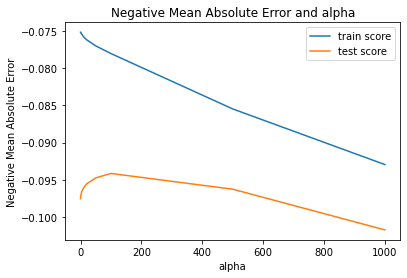

In [93]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [97]:

print("\n The best estimator across ALL searched params:\n",
          model_cv.best_estimator_)
print("\n The best score across ALL searched params:\n",
          model_cv.best_score_)
print("\n The best parameters across ALL searched params:\n",
          model_cv.best_params_)


 The best estimator across ALL searched params:
 Ridge(alpha=100)

 The best score across ALL searched params:
 -0.09414619155467799

 The best parameters across ALL searched params:
 {'alpha': 100}


In [98]:
#Using the best hyper parameter in the ridge Regression
alpha = 100
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-6.80016922e-03,  1.73912141e-02,  6.28800655e-02,  3.74449592e-02,
       -2.62585324e-02, -2.31688815e-02,  3.17902855e-03, -1.08121503e-03,
        4.27607066e-03,  9.80469506e-03,  2.83596791e-02,  2.46333310e-02,
        4.07304320e-02,  2.15406024e-02,  3.29639524e-04,  2.28693175e-02,
        2.00460601e-02,  1.09877727e-02,  1.81740100e-02,  8.34443889e-03,
       -5.71848176e-03,  2.84056583e-02,  1.64058445e-02,  1.03097473e-02,
       -1.28832344e-03,  5.57360130e-03, -2.08101987e-02, -2.69498633e-03,
       -4.60206326e-03,  3.38760153e-03, -5.94757932e-03,  9.77957688e-03,
        9.62320843e-03, -3.60765251e-03,  1.39487697e-03, -7.13847592e-03,
       -1.55324538e-02, -2.27229303e-02, -8.27219123e-03, -8.53512245e-03,
        1.40390928e-02,  5.66866614e-03,  2.51464052e-02,  1.13410650e-02,
        6.27073849e-03,  4.66383155e-03, -7.98215919e-03,  2.98568555e-03,
        1.02417424e-02,  1.02334365e-02,  1.72017441e-02,  9.21563369e-03,
       -8.12274755e-03, -

In [99]:
# predict for the training dataset
y_train_pred = ridge.predict(X_train)
print('The training accuracy is:')
print(metrics.r2_score(y_true=np.exp(y_train), y_pred=np.exp(y_train_pred)))

The training accuracy is:
0.8909336921564263


In [100]:
# predict for the test dataset
y_test_pred = ridge.predict(X_test)
print('The testing accuracy is:')
print(metrics.r2_score(y_true=np.exp(y_test), y_pred=np.exp(y_test_pred)))

The testing accuracy is:
0.8873955927447391


In [101]:
# model coefficients
cols = X.columns
cols = cols.insert(0, "constant")
model_parameters = list(ridge.coef_)
list(zip(cols, model_parameters))

[('constant', -0.006800169218047558),
 ('LotFrontage', 0.017391214132874495),
 ('LotArea', 0.06288006549292258),
 ('OverallQual', 0.037444959245526994),
 ('OverallCond', -0.02625853238660002),
 ('YearBuilt', -0.02316888150086602),
 ('YearRemodAdd', 0.0031790285538446953),
 ('MasVnrArea', -0.0010812150315114592),
 ('BsmtFinSF1', 0.004276070664502665),
 ('BsmtUnfSF', 0.009804695057970726),
 ('TotalBsmtSF', 0.028359679105586975),
 ('1stFlrSF', 0.024633331039328223),
 ('2ndFlrSF', 0.0407304320178441),
 ('GrLivArea', 0.0215406023673142),
 ('BsmtFullBath', 0.0003296395236567819),
 ('BsmtHalfBath', 0.02286931752037872),
 ('FullBath', 0.020046060069656417),
 ('HalfBath', 0.010987772738063863),
 ('BedroomAbvGr', 0.018174010019312393),
 ('TotRmsAbvGrd', 0.00834443888683961),
 ('Fireplaces', -0.005718481759679523),
 ('GarageYrBlt', 0.02840565826479123),
 ('GarageCars', 0.016405844461327743),
 ('GarageArea', 0.01030974733943921),
 ('WoodDeckSF', -0.0012883234369486767),
 ('OpenPorchSF', 0.00557360

In [102]:
# model coefficients
cols = X.columns
cols = cols.insert(0, "constant")
model_parameters = list(ridge.coef_)
ridge_list = list(zip(cols, model_parameters))

In [103]:
final_pred_ridge = []
for i in range(len(ridge_list)):
    if(ridge_list[i][1]!=0):
        final_pred_ridge.append(ridge_list[i][0])
print('Number of predictors selected by optimal alpha for ridge are:{0}'.format(len(final_pred_ridge)))

Number of predictors selected by optimal alpha for ridge are:170


DOUBLING THE HYPERPARAMETER VALUE FOR RIDGE

In [105]:
alpha_double = 200
ridge_double = Ridge(alpha=alpha_double)

ridge_double.fit(X_train, y_train)
ridge_double.coef_

array([-3.31508372e-03,  1.54897799e-02,  5.64721899e-02,  3.37502805e-02,
       -2.11205756e-02, -2.36665445e-02,  5.54689974e-03,  3.16954030e-03,
        4.60666830e-03,  1.35219200e-02,  2.71447337e-02,  1.97391973e-02,
        3.59571104e-02,  1.90423893e-02,  1.63030917e-04,  2.15202025e-02,
        1.82956183e-02,  1.06910283e-02,  2.01398896e-02,  1.19472146e-02,
       -7.12459717e-03,  2.56863869e-02,  1.81859755e-02,  1.06500069e-02,
        5.81659239e-05,  4.90348218e-03, -2.06632491e-02, -2.37376679e-03,
       -2.87497116e-03,  3.01034252e-03, -1.93836481e-03,  9.80416075e-03,
        7.19761705e-03, -3.10079459e-03,  1.04650856e-03, -6.41578637e-03,
       -1.20352827e-02, -1.84241992e-02, -7.37285596e-03, -8.13653386e-03,
        1.06708553e-02,  3.36473113e-03,  1.72131683e-02,  1.48269048e-03,
        5.60435987e-03,  4.38724888e-03, -8.90787017e-03,  1.54721662e-03,
        8.31785547e-03,  8.23462970e-03,  1.28527801e-02,  9.63545657e-03,
       -6.65772089e-03, -

In [106]:
# predict
y_train_pred_double = ridge_double.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred_double))

0.9098074599760325


In [107]:
rsquare = metrics.r2_score(y_true=y_train, y_pred=y_train_pred_double)
rssbytss = 1-rsquare
rssbytss

0.09019254002396748

In [108]:
y_test_pred = ridge_double.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8783040265445399


In [109]:
# model coefficients
cols = X.columns
cols = cols.insert(0, "constant")
model_parameters = list(ridge_double.coef_)
ridge_doble_list = list(zip(cols, model_parameters))

In [110]:
ridge_doble_list

[('constant', -0.0033150837234306725),
 ('LotFrontage', 0.015489779864919373),
 ('LotArea', 0.056472189855472685),
 ('OverallQual', 0.033750280478071146),
 ('OverallCond', -0.021120575635327418),
 ('YearBuilt', -0.023666544453889594),
 ('YearRemodAdd', 0.005546899736667628),
 ('MasVnrArea', 0.0031695403040868757),
 ('BsmtFinSF1', 0.004606668296974981),
 ('BsmtUnfSF', 0.013521920042705271),
 ('TotalBsmtSF', 0.02714473365839208),
 ('1stFlrSF', 0.019739197263003747),
 ('2ndFlrSF', 0.035957110445438964),
 ('GrLivArea', 0.019042389280674515),
 ('BsmtFullBath', 0.00016303091733044765),
 ('BsmtHalfBath', 0.0215202025158822),
 ('FullBath', 0.018295618292949126),
 ('HalfBath', 0.010691028259537846),
 ('BedroomAbvGr', 0.020139889618183644),
 ('TotRmsAbvGrd', 0.011947214595733736),
 ('Fireplaces', -0.007124597172301031),
 ('GarageYrBlt', 0.025686386864962593),
 ('GarageCars', 0.018185975489432172),
 ('GarageArea', 0.010650006917667114),
 ('WoodDeckSF', 5.816592393281756e-05),
 ('OpenPorchSF', 0.0

In [112]:
final_pred_ridge_double =[]
for i in range(len(ridge_doble_list)):
    if(ridge_doble_list[i][1]!=0):
        final_pred_ridge_double.append(ridge_doble_list[i][0])
print('Number of predictors selected by double the optimal alpha for ridge are:{0}'.format(len(final_pred_ridge_double)))

Number of predictors selected by double the optimal alpha for ridge are:170


LASSO

In [113]:
# list of alphas to tune
params = {'alpha': [0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01]}


lasso = Lasso()

# cross validation
model_lasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_lasso_cv.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [114]:
cv_results_lasso = pd.DataFrame(model_cv.cv_results_)
cv_results_lasso.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.011166,0.012784,0.002263,0.000695,0.0001,{'alpha': 0.0001},-0.095927,-0.096994,-0.104877,-0.091132,...,-0.097546,0.004458,27,-0.078056,-0.067652,-0.072228,-0.080052,-0.077817,-0.075161,0.004568
1,0.003458,0.000333,0.001654,0.000327,0.001,{'alpha': 0.001},-0.095928,-0.096993,-0.104877,-0.091132,...,-0.097545,0.004458,26,-0.078056,-0.067652,-0.072227,-0.080052,-0.077817,-0.075161,0.004568
2,0.003241,0.000323,0.001504,0.000209,0.01,{'alpha': 0.01},-0.095930,-0.096983,-0.104871,-0.091127,...,-0.097542,0.004457,25,-0.078055,-0.067655,-0.072226,-0.080054,-0.077817,-0.075161,0.004568
3,0.002977,0.000078,0.001378,0.000011,0.05,{'alpha': 0.05},-0.095941,-0.096941,-0.104847,-0.091108,...,-0.097524,0.004455,24,-0.078051,-0.067667,-0.072220,-0.080061,-0.077817,-0.075163,0.004566
4,0.003336,0.000429,0.001881,0.000640,0.1,{'alpha': 0.1},-0.095954,-0.096890,-0.104828,-0.091083,...,-0.097505,0.004456,23,-0.078046,-0.067682,-0.072214,-0.080069,-0.077816,-0.075165,0.004563


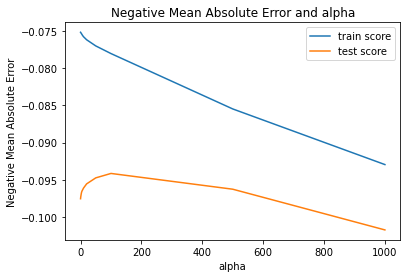

In [115]:
# plotting mean test and train scoes with alpha 
cv_results_lasso['param_alpha'] = cv_results_lasso['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results_lasso['param_alpha'], cv_results_lasso['mean_train_score'])
plt.plot(cv_results_lasso['param_alpha'], cv_results_lasso['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [116]:
print("\n The best estimator across ALL searched params:\n",
          model_lasso_cv.best_estimator_)
print("\n The best score across ALL searched params:\n",
          model_lasso_cv.best_score_)
print("\n The best parameters across ALL searched params:\n",
          model_lasso_cv.best_params_)


 The best estimator across ALL searched params:
 Lasso(alpha=0.001)

 The best score across ALL searched params:
 -0.09291881540789497

 The best parameters across ALL searched params:
 {'alpha': 0.001}


In [117]:
alpha_lasso =0.001

lasso = Lasso(alpha=alpha_lasso)
        
lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [118]:
lasso.coef_

array([-9.99578331e-03,  1.84249395e-02,  7.51006733e-02,  4.17795736e-02,
       -4.75934372e-02, -2.11751768e-02, -0.00000000e+00, -0.00000000e+00,
        4.68766329e-03,  0.00000000e+00,  8.74903783e-05,  0.00000000e+00,
        9.91391952e-02,  2.36554995e-02,  0.00000000e+00,  1.93155606e-02,
        1.68519899e-02,  8.76654507e-03,  9.28262446e-03,  0.00000000e+00,
       -9.31605926e-04,  4.21052738e-02,  5.05697693e-03,  8.98906797e-03,
       -3.73570690e-04,  4.26484753e-03, -2.12996019e-02, -3.01766082e-03,
       -7.45832361e-04,  1.30575613e-03, -1.88064643e-02,  3.05935834e-03,
        3.01643232e-03, -4.10256715e-03,  0.00000000e+00, -7.41564390e-03,
       -1.79686241e-02, -3.42160826e-02, -9.32049892e-03, -8.87856749e-03,
        4.26874817e-02,  2.14062948e-02,  8.84176848e-02,  5.99137079e-02,
        5.03382162e-03,  4.32384051e-03, -6.25009366e-03,  2.25850494e-03,
        1.14876223e-02,  1.29799736e-02,  2.17042541e-02,  7.59250644e-03,
       -7.52751018e-03, -

In [119]:
model_parameters = list(lasso.coef_)
# model coefficients
cols = X.columns
cols = cols.insert(0, "constant")
model_parameters = list(lasso.coef_)
lasso_list = list(zip(cols, model_parameters))

In [120]:
lasso_list

[('constant', -0.009995783306644704),
 ('LotFrontage', 0.01842493945692052),
 ('LotArea', 0.07510067332812041),
 ('OverallQual', 0.04177957356827129),
 ('OverallCond', -0.04759343718137148),
 ('YearBuilt', -0.02117517684648159),
 ('YearRemodAdd', -0.0),
 ('MasVnrArea', -0.0),
 ('BsmtFinSF1', 0.004687663294690423),
 ('BsmtUnfSF', 0.0),
 ('TotalBsmtSF', 8.749037830339887e-05),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.09913919524855144),
 ('GrLivArea', 0.023655499463015376),
 ('BsmtFullBath', 0.0),
 ('BsmtHalfBath', 0.01931556062335068),
 ('FullBath', 0.016851989900134978),
 ('HalfBath', 0.008766545072513128),
 ('BedroomAbvGr', 0.009282624461056113),
 ('TotRmsAbvGrd', 0.0),
 ('Fireplaces', -0.0009316059261736915),
 ('GarageYrBlt', 0.04210527377528782),
 ('GarageCars', 0.005056976930827431),
 ('GarageArea', 0.008989067970058271),
 ('WoodDeckSF', -0.00037357069023808423),
 ('OpenPorchSF', 0.004264847530172442),
 ('YrSold', -0.021299601937247066),
 ('MSSubClass_30', -0.0030176608204740074),
 ('MS

In [121]:
#List of all predictors with non zero co-efficients
for i in range(len(lasso_list)):
    if(lasso_list[i][1]!=0):
        print(lasso_list[i][0])

constant
LotFrontage
LotArea
OverallQual
OverallCond
YearBuilt
BsmtFinSF1
TotalBsmtSF
2ndFlrSF
GrLivArea
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
Fireplaces
GarageYrBlt
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
YrSold
MSSubClass_30
MSSubClass_40
MSSubClass_45
MSSubClass_50
MSSubClass_60
MSSubClass_70
MSSubClass_75
MSSubClass_85
MSSubClass_90
MSSubClass_120
MSSubClass_160
MSSubClass_180
MSSubClass_190
MSZoning_FV
MSZoning_RH
MSZoning_RL
MSZoning_RM
Street_Pave
LotShape_IR2
LotShape_IR3
LotShape_Reg
LandContour_HLS
LandContour_Low
LandContour_Lvl
LotConfig_CulDSac
LotConfig_FR2
LotConfig_FR3
LotConfig_Inside
LandSlope_Mod
Neighborhood_Blueste
Neighborhood_BrDale
Neighborhood_BrkSide
Neighborhood_ClearCr
Neighborhood_CollgCr
Neighborhood_Crawfor
Neighborhood_Gilbert
Neighborhood_IDOTRR
Neighborhood_MeadowV
Neighborhood_NWAmes
Neighborhood_NoRidge
Neighborhood_NridgHt
Neighborhood_OldTown
Neighborhood_SWISU
Neighborhood_Sawyer
Neighborhood_SawyerW
Neighborhood_Somerst
Neighborhood_St

In [122]:
lm = Lasso(alpha=0.001)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print('The training accuracy is:')
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print('The test accuracy is:')
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

The training accuracy is:
0.9183979816217712
The test accuracy is:
0.8851756248467324


In [124]:
final_pred_lasso =[]
for i in range(len(lasso_list)):
    if(lasso_list[i][1]!=0):
        final_pred_lasso.append(lasso_list[i][0])
print('Number of predictors selected by optimaloptimal alpha for ridge are:{0}'.format(len(final_pred_lasso)))

Number of predictors selected by optimaloptimal alpha for ridge are:127


Doubling the alpha for lasso

In [125]:
lm_double = Lasso(alpha=0.002)
lm_double.fit(X_train, y_train)

# predict
y_train_pred_double = lm_double.predict(X_train)
print('The training accuracy is:')
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred_double))
y_test_pred_double = lm.predict(X_test)
print('The test accuracy is:')
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred_double))

The training accuracy is:
0.9114997502744537
The test accuracy is:
0.8851756248467324


In [129]:
model_parameters = list(lm_double.coef_)
# model coefficients
cols = X.columns
cols = cols.insert(0, "constant")
model_parameters = list(lm_double.coef_)
a = list(zip(cols, model_parameters))
#List of all predictors with non zero co-efficients

final_pred =[]
for i in range(len(a)):
    if(a[i][1]!=0):
        final_pred.append(a[i][0])
print('Number of predictors selected by double the optimal alpha for lasso are:{0}'.format(len(final_pred)))

Number of predictors selected by double the optimal alpha for lasso are:113


In [130]:
lm_double

Lasso(alpha=0.002)

In [131]:
lasso_list

[('constant', -0.009995783306644704),
 ('LotFrontage', 0.01842493945692052),
 ('LotArea', 0.07510067332812041),
 ('OverallQual', 0.04177957356827129),
 ('OverallCond', -0.04759343718137148),
 ('YearBuilt', -0.02117517684648159),
 ('YearRemodAdd', -0.0),
 ('MasVnrArea', -0.0),
 ('BsmtFinSF1', 0.004687663294690423),
 ('BsmtUnfSF', 0.0),
 ('TotalBsmtSF', 8.749037830339887e-05),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.09913919524855144),
 ('GrLivArea', 0.023655499463015376),
 ('BsmtFullBath', 0.0),
 ('BsmtHalfBath', 0.01931556062335068),
 ('FullBath', 0.016851989900134978),
 ('HalfBath', 0.008766545072513128),
 ('BedroomAbvGr', 0.009282624461056113),
 ('TotRmsAbvGrd', 0.0),
 ('Fireplaces', -0.0009316059261736915),
 ('GarageYrBlt', 0.04210527377528782),
 ('GarageCars', 0.005056976930827431),
 ('GarageArea', 0.008989067970058271),
 ('WoodDeckSF', -0.00037357069023808423),
 ('OpenPorchSF', 0.004264847530172442),
 ('YrSold', -0.021299601937247066),
 ('MSSubClass_30', -0.0030176608204740074),
 ('MS

Removing the top 5 contributors from the lasso regression:

In [132]:
X_train_new = X_train.drop(['2ndFlrSF', 'MSZoning_RH', 'LotArea', 'MSZoning_RL', 'MSSubClass_190'], axis=1)

In [133]:
X_test_new = X_test.drop(['2ndFlrSF', 'MSZoning_RH', 'LotArea', 'MSZoning_RL', 'MSSubClass_190'], axis=1)

In [134]:
X_train_new.columns

Index(['LotFrontage', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF',
       ...
       'FireplaceQu_TA', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'GarageType_NA', 'GarageFinish_NA', 'GarageFinish_RFn',
       'GarageFinish_Unf'],
      dtype='object', length=166)

In [135]:
model_lasso_cv.fit(X_train_new, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [136]:
cv_results_lasso = pd.DataFrame(model_lasso_cv.cv_results_)

In [137]:
print("\n The best estimator across ALL searched params:\n",
          model_lasso_cv.best_estimator_)
print("\n The best score across ALL searched params:\n",
          model_lasso_cv.best_score_)
print("\n The best parameters across ALL searched params:\n",
          model_lasso_cv.best_params_)


 The best estimator across ALL searched params:
 Lasso(alpha=0.001)

 The best score across ALL searched params:
 -0.0953245872033766

 The best parameters across ALL searched params:
 {'alpha': 0.001}


In [138]:
alpha_lasso =0.001

lasso = Lasso(alpha=alpha_lasso)
        
lasso.fit(X_train_new, y_train)

Lasso(alpha=0.001)

In [139]:
model_parameters = list(lasso.coef_)
# model coefficients
cols = X.columns
cols = cols.insert(0, "constant")
model_parameters = list(lasso.coef_)
lasso_list = list(zip(cols, model_parameters))

In [140]:
lm = Lasso(alpha=0.001)
lm.fit(X_train_new, y_train)

# predict
y_train_pred = lm.predict(X_train_new)
print('The training accuracy is:')
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test_new)
print('The test accuracy is:')
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

The training accuracy is:
0.9137709650252541
The test accuracy is:
0.8822024100962261


In [141]:
lasso_list

[('constant', -0.00689690184336607),
 ('LotFrontage', 0.07550895503530225),
 ('LotArea', 0.04466187704719074),
 ('OverallQual', -0.05002667701032826),
 ('OverallCond', -0.019793365406485734),
 ('YearBuilt', 0.0),
 ('YearRemodAdd', -0.0007346393987858287),
 ('MasVnrArea', 0.006163259895807443),
 ('BsmtFinSF1', 0.0),
 ('BsmtUnfSF', 0.004749928135989788),
 ('TotalBsmtSF', 0.09514150540713473),
 ('1stFlrSF', 0.02562122078753316),
 ('2ndFlrSF', -0.0),
 ('GrLivArea', 0.022377873261939334),
 ('BsmtFullBath', 0.019215047297446653),
 ('BsmtHalfBath', 0.008576805354332181),
 ('FullBath', 0.009214951355224136),
 ('HalfBath', 0.0),
 ('BedroomAbvGr', -0.0),
 ('TotRmsAbvGrd', 0.03839247220438855),
 ('Fireplaces', 0.00783079582339937),
 ('GarageYrBlt', 0.011024506620138383),
 ('GarageCars', -0.0006065642378275405),
 ('GarageArea', 0.004595561205385019),
 ('WoodDeckSF', -0.016114586096385594),
 ('OpenPorchSF', -0.003494518677489725),
 ('YrSold', -0.0),
 ('MSSubClass_30', 0.00961672379689157),
 ('MSSub

In [142]:
final_lasso_new_pred =[]
for i in range(len(lasso_list)):
    if(lasso_list[i][1]!=0):
        final_lasso_new_pred.append(lasso_list[i][0])
print('Number of predictors selected by double the optimal alpha for lasso are:{0}'.format(len(final_lasso_new_pred)))

Number of predictors selected by double the optimal alpha for lasso are:129
